In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Project Info

Multi-Class Prediction of Cirrhosis outcomes is a supervised classification problem. The data consists of thousands of patient metrics, including information on their sex, their cholesterol, copper levels, and more. My target variable is the patient "status," which includes C: Survived, CL: Survived w/ liver transplant, and D: Died. My goal is to use the data provided to predict whether a patient has died, survived, or survived with a liver transplant, based on the features provided.
* https://www.kaggle.com/competitions/playground-series-s3e26/overview

In [13]:
df = pd.read_csv('train.csv')

## Data Exploration/Visualization

In [14]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [15]:
# A lot of categorical variables present. Status (Target) is categorical

In [16]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [17]:
# Doesn't look like there are any missing variables (numerical).

In [18]:
a = df.select_dtypes(include=['int64', 'float64'])
list(a)

['id',
 'N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

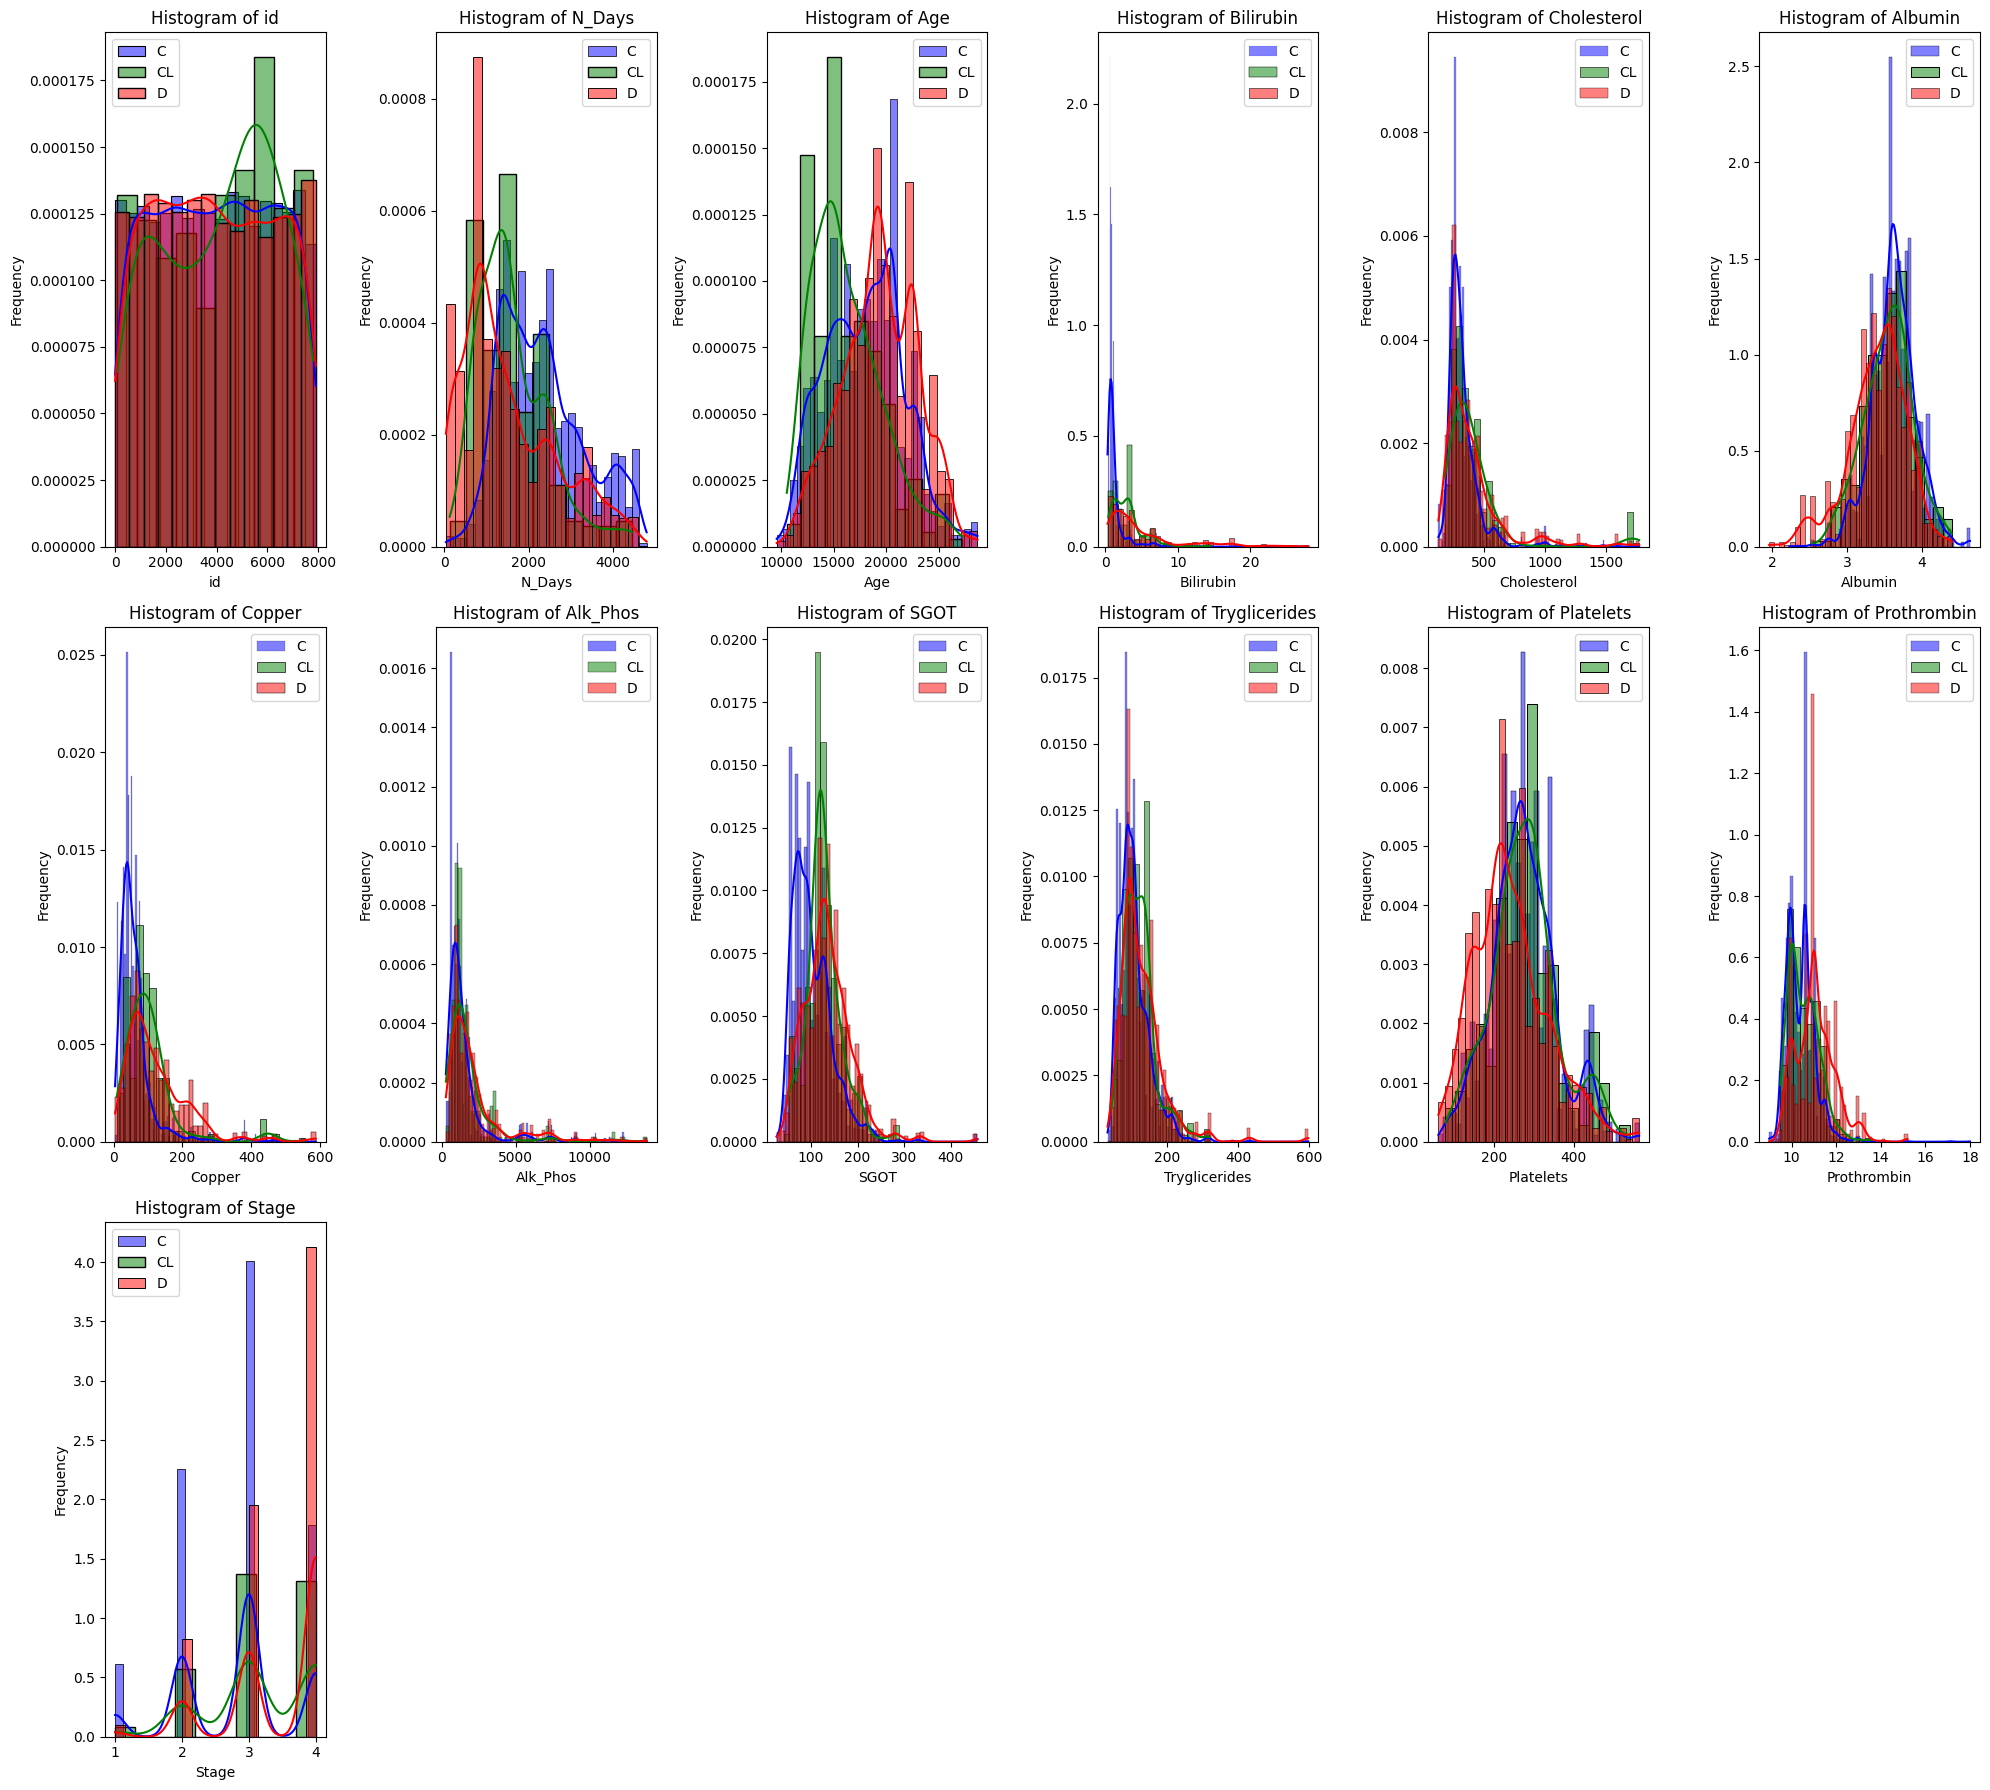

In [19]:
numerical_columns = ['id',
 'N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

num_cols = len(df[numerical_columns].columns)
num_rows = num_cols // 6 + (num_cols % 6 > 0) #calculating the needed amount of columns

fig, axes = plt.subplots(num_rows, 6, figsize=(20, 6* num_rows))
axes = axes.flatten()

palette = {'C': 'blue', 'CL': 'green', 'D': 'red'}

for i, column in enumerate(df[numerical_columns].columns):
    for target_class in ['C', 'CL', 'D']:
        sns.histplot(df[df['Status'] == target_class][column], kde=True, color=palette[target_class], ax=axes[i], label=target_class, stat='density')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for j in range(num_cols, num_rows * 6): #hiding any unused subplots
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()


In [20]:
# ADD-ON : There seems to be a lot of features that are distinguishable between classes. 
#Class C (Blue) tends towards lower levels of Bilrubin, Copper, SGOT.
# Class CL (Green) Tends towards lower age.
# Class D shows higher age and lower platelet count.
# CLASS IMBALANCE: Most are Class C or D.

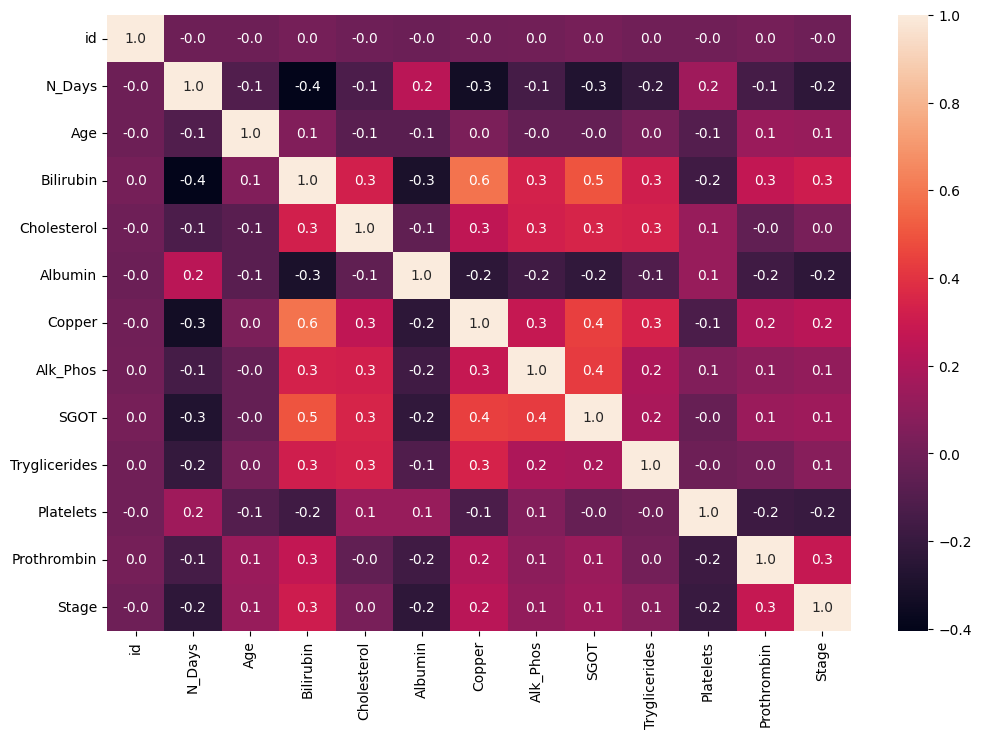

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(method='spearman'), annot=True, fmt=".1f", )
plt.show()

In [22]:
# ADD-ON: Looking at Stage (Target). Prothombin, Bilirubin have the highest positive correlations.
# N_Days, Albumin, and Platelets are negatively correlated.

## Data Preprocessing

In [23]:
df.info() #Doesn't look like my data contains any null inputs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [24]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n") #Target doesn't appear to contain any typos.

Value Counts for Drug:
Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64

Value Counts for Sex:
Sex
F    7336
M     569
Name: count, dtype: int64

Value Counts for Ascites:
Ascites
N    7525
Y     380
Name: count, dtype: int64

Value Counts for Hepatomegaly:
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64

Value Counts for Spiders:
Spiders
N    5966
Y    1939
Name: count, dtype: int64

Value Counts for Edema:
Edema
N    7161
S     399
Y     345
Name: count, dtype: int64

Value Counts for Status:
Status
C     4965
D     2665
CL     275
Name: count, dtype: int64



In [25]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = (df[numerical_columns]< (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))

print("Columns with outliers:")
print(outliers.any())

Columns with outliers:
id               False
N_Days           False
Age               True
Bilirubin         True
Cholesterol       True
Albumin           True
Copper            True
Alk_Phos          True
SGOT              True
Tryglicerides     True
Platelets         True
Prothrombin       True
Stage            False
dtype: bool


In [26]:
#I've noticed some significant outliers in my histograms. They're right tailed, I'll use a log transformation.

In [28]:
to_transform = [
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',]

df[to_transform] = np.log(df[to_transform] + 1)

In [149]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,1.193922,5.758902,1.470176,5.153292,7.379008,5.197391,4.158883,5.978886,2.370244,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.641854,5.899897,1.512927,4.158883,7.273093,4.911551,4.488636,5.891644,2.484907,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,1.458615,5.703782,1.515127,4.882802,6.937314,4.790404,3.931826,5.298317,2.541602,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.470004,5.549076,1.504077,4.077537,7.410952,4.280824,4.574711,5.598422,2.459589,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,0.741937,5.849325,1.536867,4.158883,7.074963,4.840637,4.574711,5.700444,2.451005,4.0,C


In [29]:
outliers = (df[numerical_columns]< (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))

print("Columns with outliers:")
print(outliers.any())

Columns with outliers:
id               False
N_Days           False
Age               True
Bilirubin        False
Cholesterol       True
Albumin           True
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets         True
Prothrombin       True
Stage            False
dtype: bool


In [34]:
## Some outliers are present still after transforming. For now, I'll keep these. Outliers may be significant in medical data.

In [35]:
#I'll scale and encode my dataset.


categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

for col in categorical_columns:
    print(f'Possible {col} values:', df[col].unique())

Possible Drug values: ['D-penicillamine' 'Placebo']
Possible Sex values: ['M' 'F']
Possible Ascites values: ['N' 'Y']
Possible Hepatomegaly values: ['N' 'Y']
Possible Spiders values: ['N' 'Y']
Possible Edema values: ['N' 'Y' 'S']
Possible Status values: ['D' 'C' 'CL']


In [36]:
from sklearn.preprocessing import RobustScaler #less sensitive to outliers, which my data has a lot of.
#scaling the features in preparation for random forest.

scaler = RobustScaler()
to_scale = ['N_Days','Bilirubin','Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
df[to_scale] = scaler.fit_transform(df[to_scale])

In [37]:
df['Drug'].replace('D-penicillamine', 0, inplace=True)
df['Drug'].replace('Placebo', 1, inplace=True)

df['Sex'].replace('F', 0, inplace=True) #all these categories were so different, didn't know how else to handle lol
df['Sex'].replace('M', 1, inplace=True) #I got better results using label encoding instead of one-hot.

df['Ascites'].replace('N', 0, inplace=True)
df['Ascites'].replace('Y', 1, inplace=True)

df['Hepatomegaly'].replace('N', 0, inplace=True)
df['Hepatomegaly'].replace('S', 1, inplace=True)
df['Hepatomegaly'].replace('Y', 2, inplace=True)

df['Spiders'].replace('N', 0, inplace=True)
df['Spiders'].replace('Y', 1, inplace=True)

df['Edema'].replace('N', 0, inplace=True)
df['Edema'].replace('S', 1, inplace=True)
df['Edema'].replace('Y', 2, inplace=True)

df['Status'].replace('C', 0, inplace=True)
df['Status'].replace('CL', 1, inplace=True)
df['Status'].replace('D', 2, inplace=True)

In [38]:
df.head() #Scaled and label-encoded

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,-0.570254,0,0.551663,1,0,0,0,0,0.519505,0.129756,-0.563507,0.959248,0.375275,0.804352,-1.044652,0.950372,-0.936540,0.0,2
1,1,0.509253,1,0.102544,0,0,0,0,0,-0.133251,0.438155,-0.095121,0.000000,0.246115,0.354213,-0.338311,0.745389,0.386621,0.0,0
2,2,1.094585,1,-0.975734,0,0,2,1,2,0.776016,0.007442,-0.071231,0.714608,-0.174568,0.156825,-1.557776,-0.721594,1.024860,0.5,2
3,3,0.510624,1,-0.049511,0,0,0,0,0,-0.382227,-0.341315,-0.191421,-0.086494,0.413909,-0.721333,-0.160920,0.036901,0.098249,0.0,0
4,4,-0.714873,1,-0.402153,0,0,2,0,0,0.000000,0.328269,0.163702,0.000000,0.000000,0.239168,-0.160920,0.286917,0.000000,0.5,0


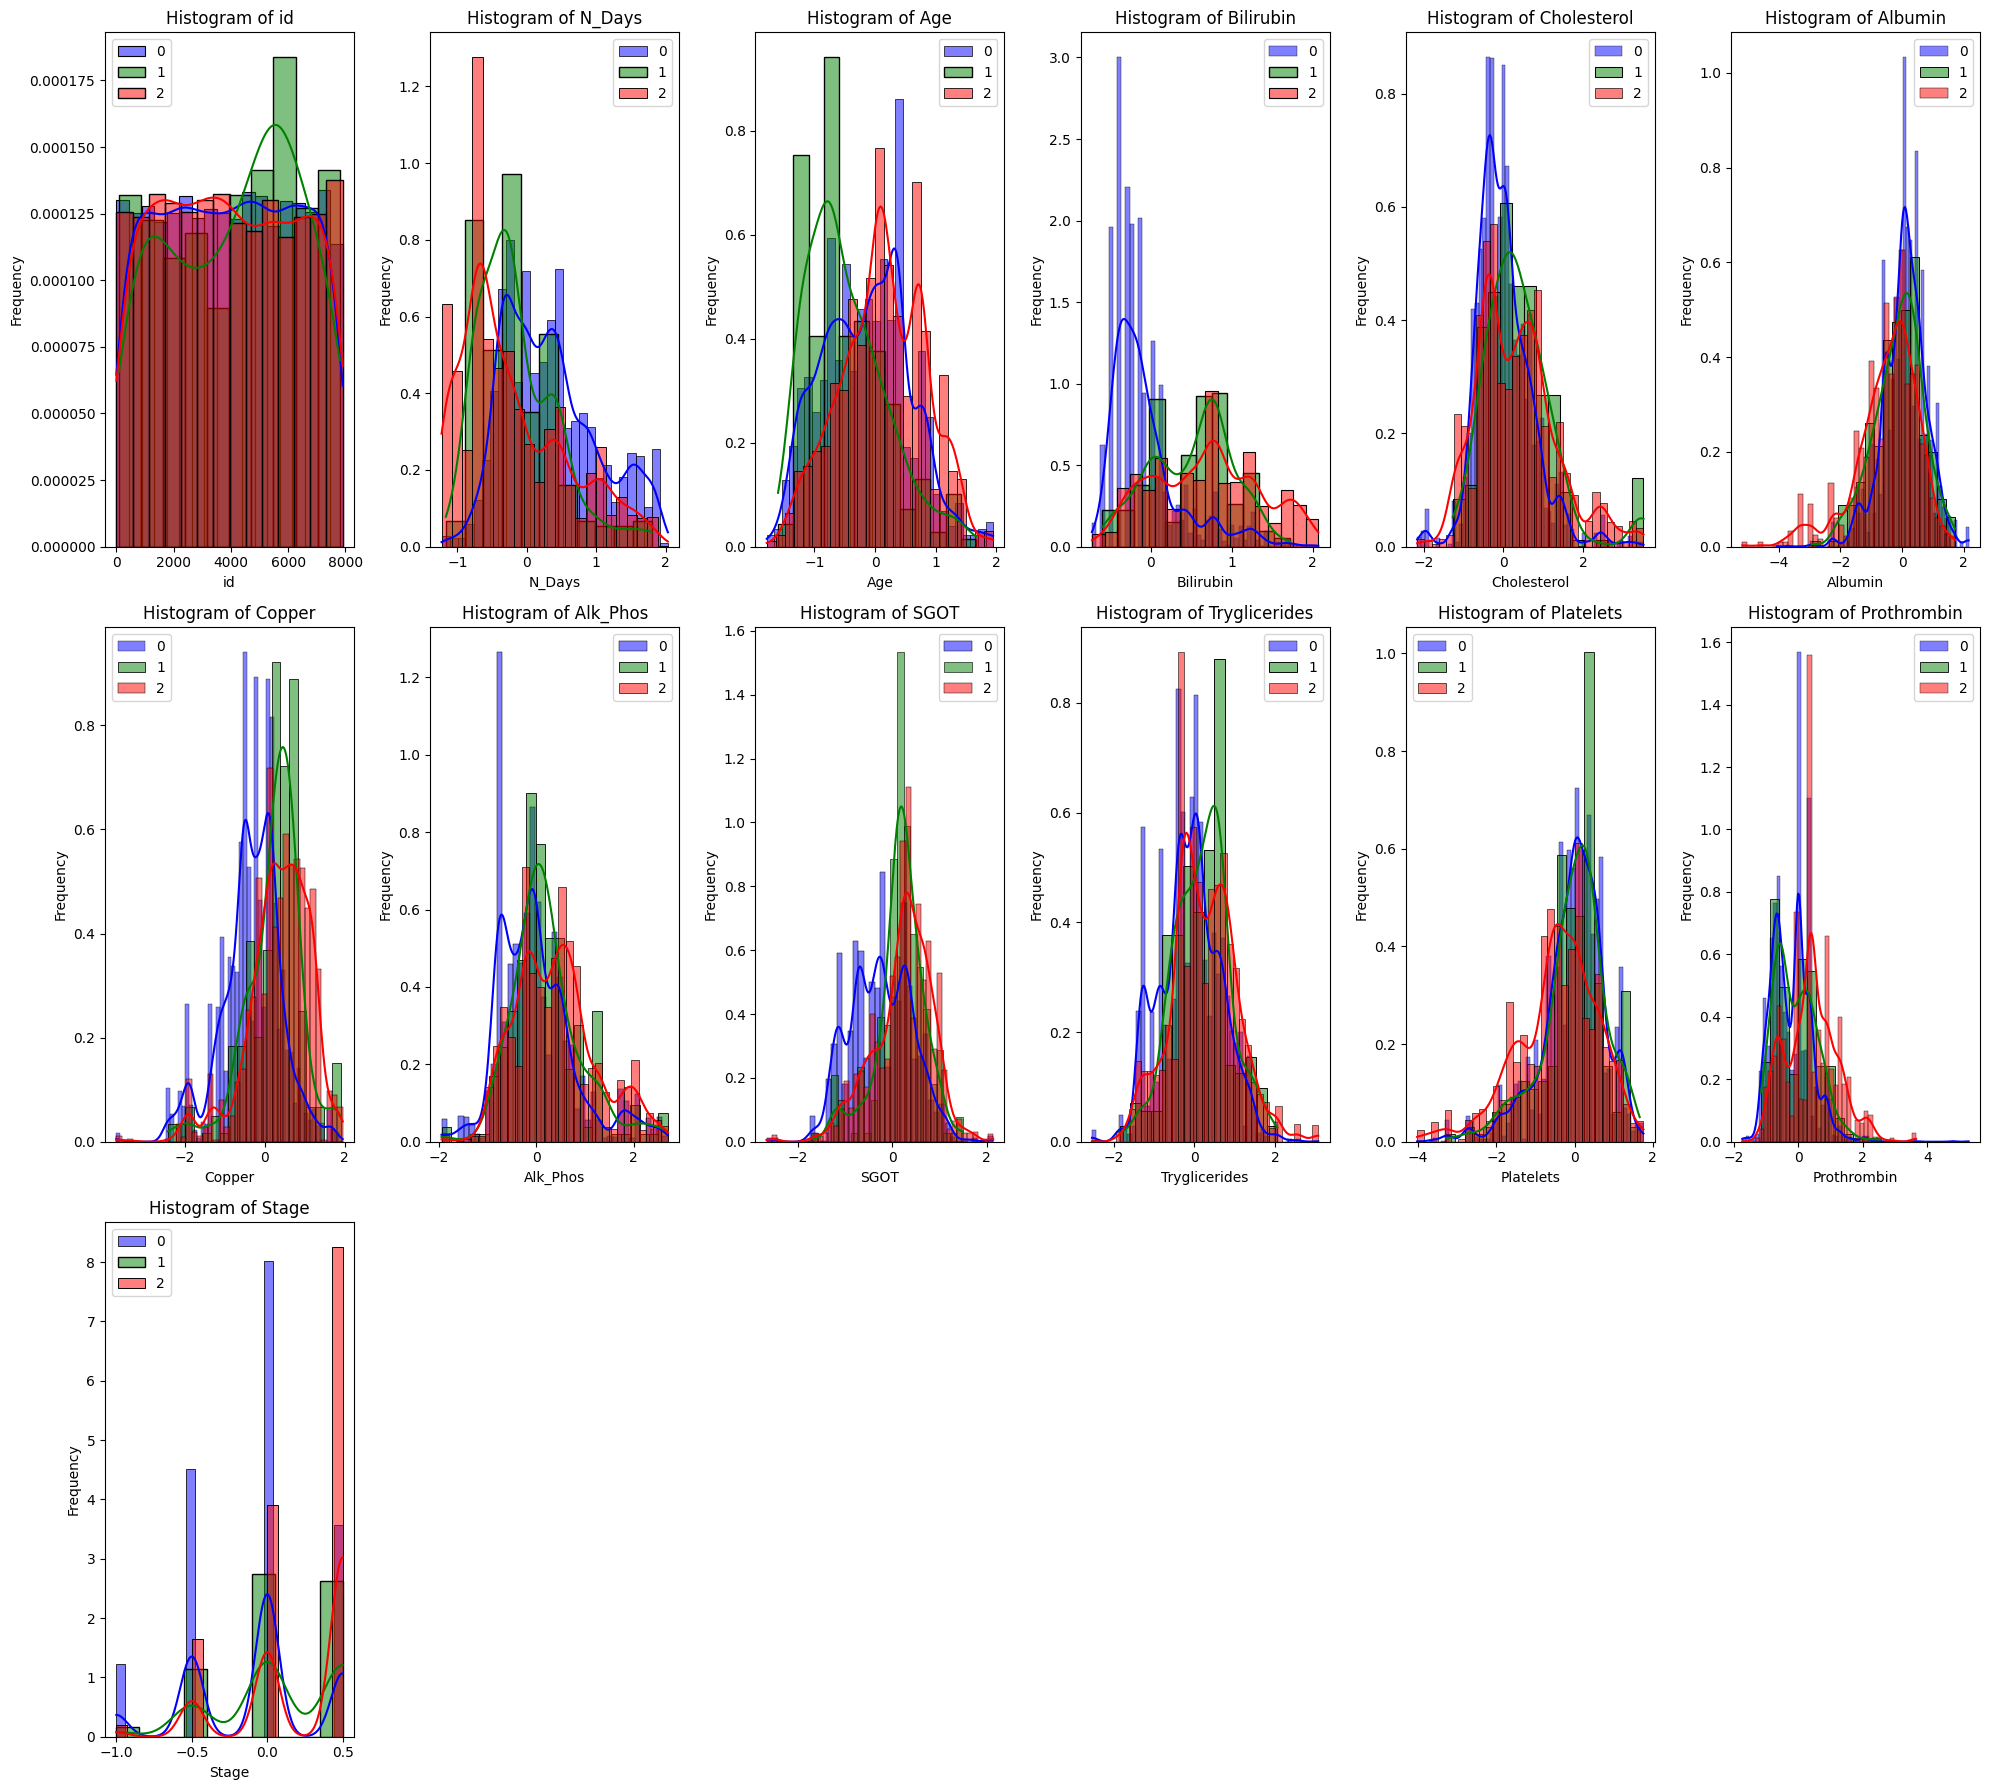

In [39]:
fig, axes = plt.subplots(num_rows, 6, figsize=(20, 6* num_rows))
axes = axes.flatten()

palette = {0: 'blue', 1: 'green', 2: 'red'}

for i, column in enumerate(df[numerical_columns].columns):
    for target_class in [0, 1, 2]:
        sns.histplot(df[df['Status'] == target_class][column], kde=True, color=palette[target_class], ax=axes[i], label=target_class, stat='density')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for j in range(num_cols, num_rows * 6): #hiding any unused subplots
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()


In [155]:
#Histograms of numerical features AFTER scaling and transforming.

In [40]:
## ADD-ON: Bilrubin and Age seem like distinct variables. Bilrubin is ESPECIALLY an important indicator among my class "0" 
## Class "0" has a tendancy to exhibit low Bilrubin scores, Copper.
## Scaling and transforming made these tendencies much more apparant.


## Model Creation

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

## I chose to use RandomForest classifier because its one of the more interpretable ML classififcation models.
## RandomForest is robust to outliers and generally doesn't require too-extensive preprocessing before use.
## Normalization may have been an unnecessary step, but I found I got better results after normalizing my data.

In [53]:
X = df.drop(columns=['Status', 'id'])
y = df['Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
class_weights = dict(zip(np.unique(y_train),(len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train)))))
#using class weights to deal with my class imbalance
rf_classifier = RandomForestClassifier(class_weight=class_weights, n_estimators=300, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_val)

#Recall:
#df['Status'].replace('C', 0, inplace=True)
#df['Status'].replace('CL', 1, inplace=True)
#df['Status'].replace('D', 2, inplace=True)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.8311195445920304

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       966
           1       0.64      0.17      0.27        52
           2       0.85      0.71      0.77       563

    accuracy                           0.83      1581
   macro avg       0.77      0.61      0.64      1581
weighted avg       0.83      0.83      0.82      1581



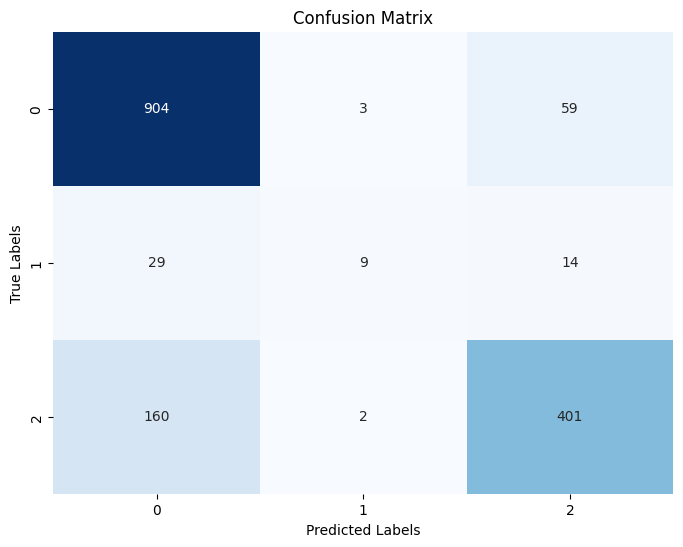

In [55]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Poor recall for class 1. A lot of false negatives. Likely to do with my class imbalance for CL.

In [57]:
y_proba = rf_classifier.predict_proba(X_val)

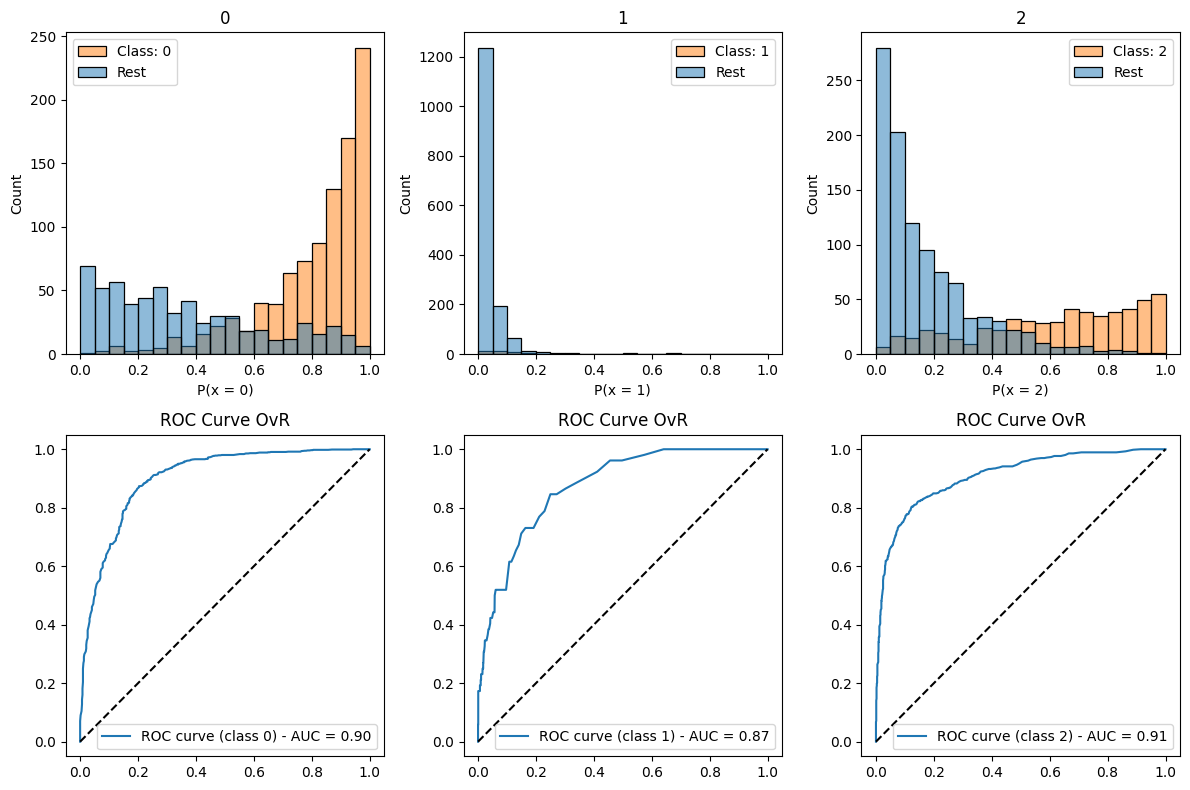

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

#ROC Curves, One vs Rest
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
classes = rf_classifier.classes_
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    df_aux = X_val.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_val]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)

    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='class', color='b', ax=ax, bins=bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 3, i + 4)
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax_bottom.plot(fpr, tpr, label='ROC curve (class {}) - AUC = {:.2f}'.format(c, roc_auc_score(df_aux['class'], df_aux['prob'])))
    ax_bottom.plot([0, 1], [0, 1], 'k--')
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.legend(loc="lower right")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

#For reference:
#df['Status'].replace('C', 0, inplace=True)
#df['Status'].replace('CL', 1, inplace=True)
#df['Status'].replace('D', 2, inplace=True)

In [59]:
# ROC Curves suggest poorer performance when predicting class 1. 

## Model Deployment

In [60]:
df_test = pd.read_csv('test.csv')

In [61]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


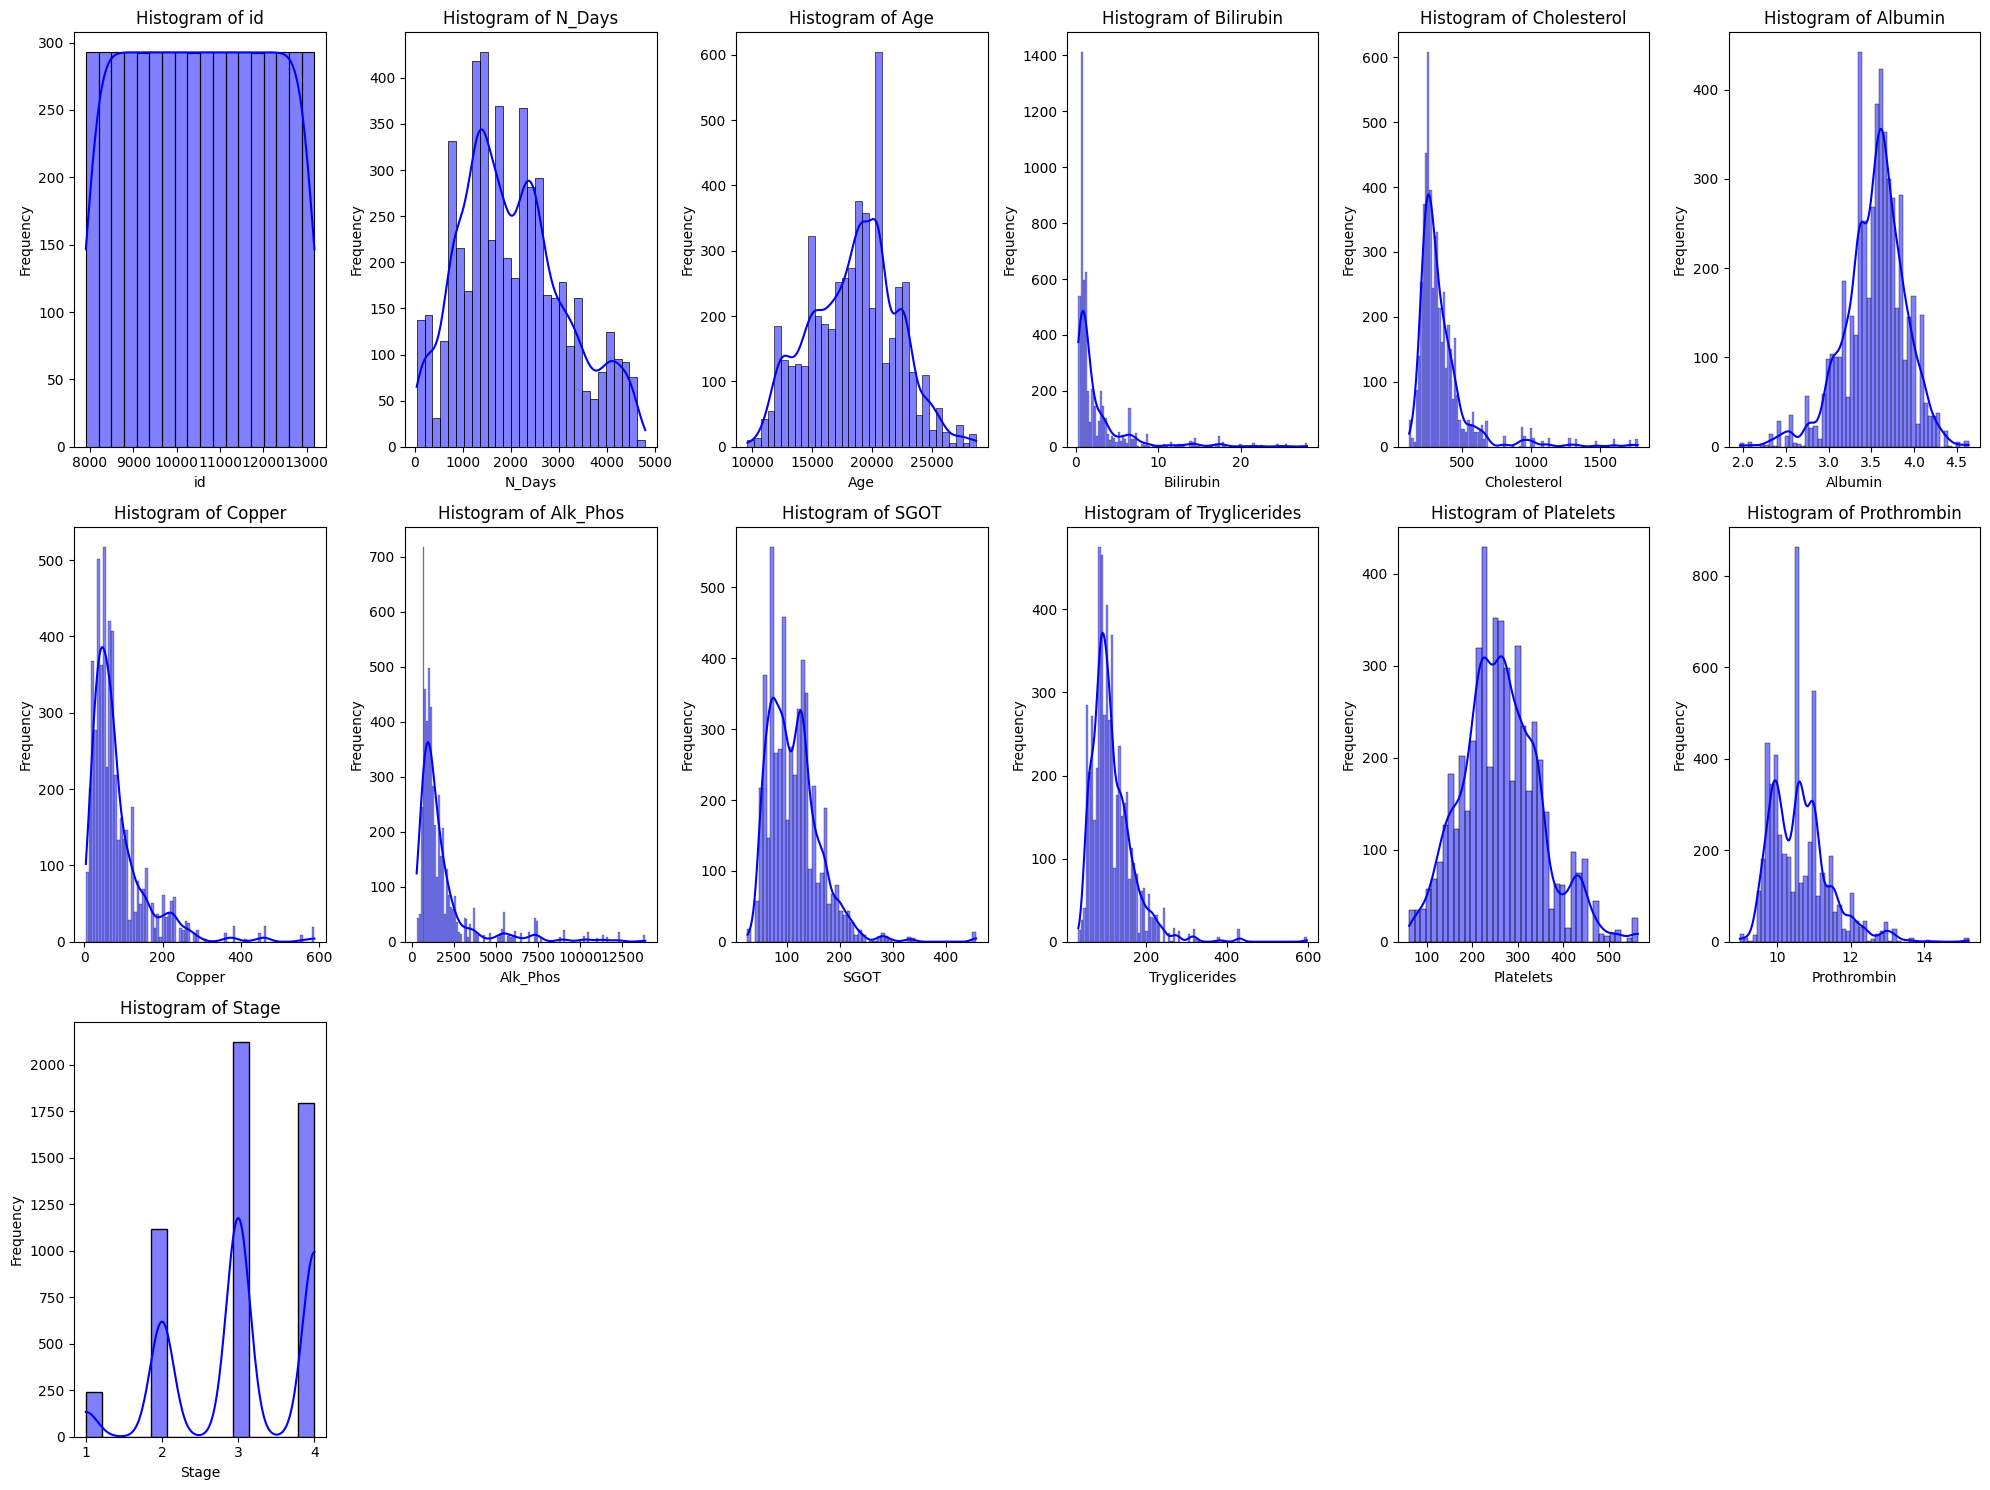

In [62]:
num_cols = len(df_test[numerical_columns].columns)
num_rows = num_cols // 6 + (num_cols % 6 > 0) #calculating the needed amount of columns

fig, axes = plt.subplots(num_rows, 6, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df_test[numerical_columns].columns):
    sns.histplot(df_test[column], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(num_cols, num_rows * 6): #hiding any unused subplots
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [64]:
df_test[to_transform] = np.log(df_test[to_transform] + 1) #Performing the same scaling and transformations to my test.

In [65]:
scaler2 = RobustScaler()
to_scale_test = ['N_Days','Bilirubin','Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

scaled_values = scaler2.fit_transform(df_test[to_scale_test])

scaled_df = pd.DataFrame(scaled_values, columns=to_scale_test)

df_test[to_scale_test] = scaled_df

In [66]:
df_test['Drug'].replace('D-penicillamine', 0, inplace=True)
df_test['Drug'].replace('Placebo', 1, inplace=True)

df_test['Sex'].replace('F', 0, inplace=True)
df_test['Sex'].replace('M', 1, inplace=True)

df_test['Ascites'].replace('N', 0, inplace=True)
df_test['Ascites'].replace('Y', 1, inplace=True)

df_test['Hepatomegaly'].replace('N', 0, inplace=True)
df_test['Hepatomegaly'].replace('S', 1, inplace=True)
df_test['Hepatomegaly'].replace('Y', 2, inplace=True)

df_test['Spiders'].replace('N', 0, inplace=True)
df_test['Spiders'].replace('Y', 1, inplace=True)

df_test['Edema'].replace('N', 0, inplace=True)
df_test['Edema'].replace('S', 1, inplace=True)
df_test['Edema'].replace('Y', 2, inplace=True)

In [67]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,1.342250,0,0.185305,0,0,2,0,0,0.059351,1.281802,-0.489192,0.000000,0.441270,0.554573,-0.296342,1.171937,0.000000,2.0
1,7906,0.401920,0,-0.773314,0,0,0,0,0,0.000000,1.663993,1.404047,0.369127,0.119667,0.554573,0.782344,-0.319322,-0.613379,2.0
2,7907,-1.255830,1,-1.141906,0,0,2,0,2,0.419486,-1.597407,-1.598094,-0.368196,-0.218831,-0.720654,-0.059419,-0.475735,2.098439,4.0
3,7908,0.307270,0,0.343964,0,0,0,0,0,-0.382227,-0.045084,0.636779,-0.523637,-0.950531,0.257347,-1.321800,0.099422,0.000000,2.0
4,7909,-0.183128,0,0.625353,0,0,2,0,0,0.166329,-0.170674,-1.569137,0.608873,-0.035719,0.250390,0.382527,-0.384958,-0.827528,1.0


In [68]:
#Using the model...

TESTSET = df_test.drop(columns=['id'])
y_test_pred=rf_classifier.predict(TESTSET)
prob_test=rf_classifier.predict_proba(TESTSET)

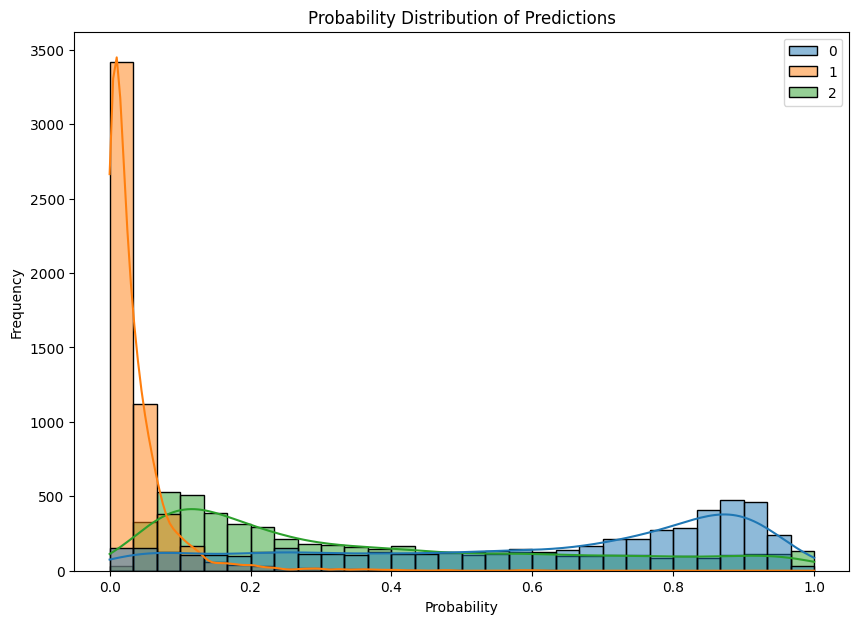

In [71]:
plt.figure(figsize=(10, 7))
sns.histplot(prob_test, kde=True, bins=30)
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show() #For a given point, least likely to be class 1. Again, imbalance in classes may be affecting my results.
#Model is having difficulty with confidently predicting class 1. Saw this in my confusion matrix, many false negatives (poor recall).

In [177]:
submission=pd.DataFrame(prob_test,columns=['Status_C','Status_D','Status_CL'])
submission['id']=df_test['id']
submission=submission[['id','Status_C','Status_D','Status_CL']]

In [178]:
submission

,id,Status_C,Status_D,Status_CL
0,7905,0.470000,0.046667,0.483333
1,7906,0.523333,0.106667,0.370000
2,7907,0.260000,0.050000,0.690000
3,7908,0.893333,0.010000,0.096667
4,7909,0.593333,0.046667,0.360000
...,...,...,...,...
5266,13171,0.723333,0.070000,0.206667
5267,13172,0.833333,0.006667,0.160000
5268,13173,0.890000,0.023333,0.086667
5269,13174,0.880000,0.036667,0.083333


In [182]:
submission.to_csv('submission1.csv',index=False)

In [183]:
#Submitted to kaggle and recieved a score of 2.17961 (log loss metric)
#Not the greatest, but everyone starts somewhere!